/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Data/psf.py:95: UserWarning: Input PSF model has at least one negative element, which is unphysical except for a PSF of an interferometric array.
  warnings.warn(
/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Plots/model_band_plot.py:68: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Plots/model_band_plot.py:68: RuntimeWarning: invalid value encountered in log10
  log_model = np.log10(model)
/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Plots/model_band_plot.py:161: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Plots/model_band_plot.py:225: RuntimeWarning: divide by zero encountered in log10
  np.log10(sel

-1.6321509196698885 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  2.4468148406808963
reduced chi^2 of data  1 =  2.1064715007374235
reduced chi^2 of data  2 =  0.7522250553570541
-1.6321509196698885 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  2.4468148406808963
reduced chi^2 of data  1 =  2.1064715007374235
reduced chi^2 of data  2 =  0.7522250553570541
-1.6321509196698885 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  2.4468148406808963
reduced chi^2 of data  1 =  2.1064715007374235
reduced chi^2 of data  2 =  0.7522250553570541


/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Plots/model_band_plot.py:225: RuntimeWarning: invalid value encountered in log10
  np.log10(self._model),


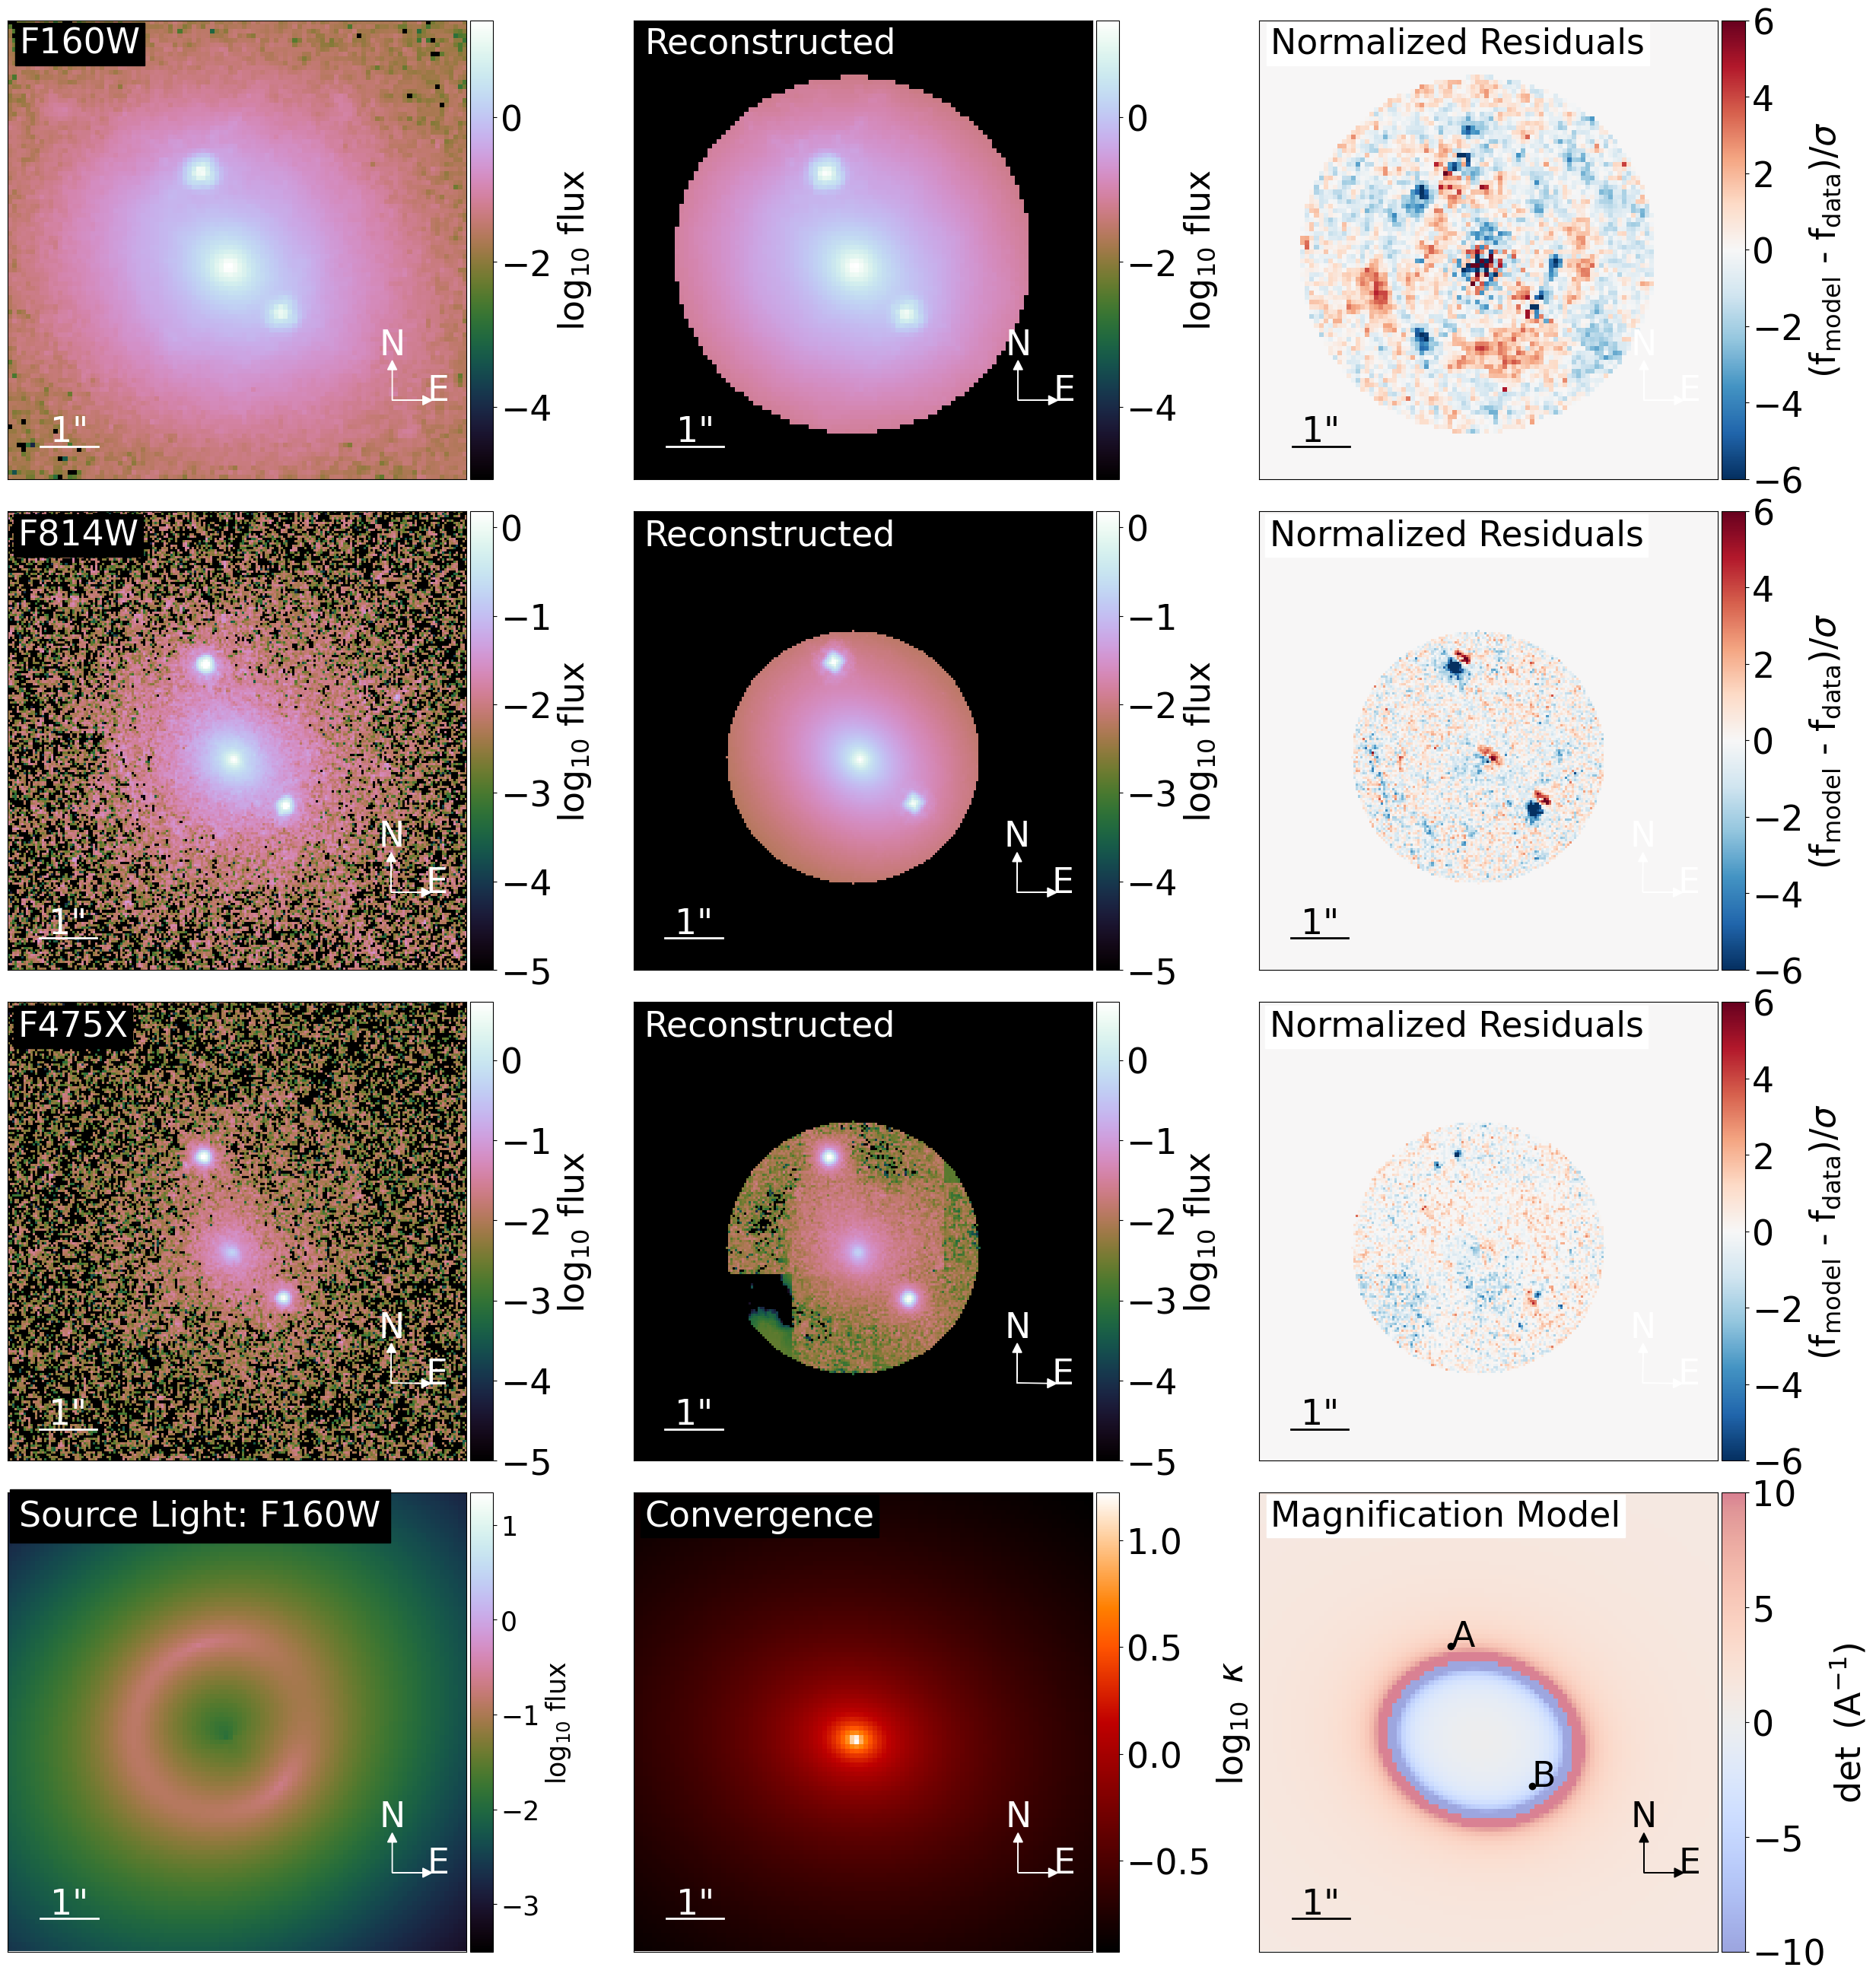

In [1]:
	
import pickle
import matplotlib.pyplot as plt
from lenstronomy.Plots.model_plot import ModelPlot

# define filters and system name
name = 'J2325-5229'
filters = ['F160W', 'F814W', 'F475X']
fontsize = 33

nrows = len(filters) + 1
fig, axes = plt.subplots(nrows, 3, figsize=(25, 26))

for i, filter in enumerate(filters):
    filename = f"../joint_modeling/{name}/{name}_joint.pkl"

    with open(filename, "rb") as f:
        loaded_data = pickle.load(f)

    kwargs_result = loaded_data["kwargs_result"]
    multi_band_list = loaded_data["multi_band_list"]
    kwargs_model = loaded_data["kwargs_model"]
    mask_list = loaded_data['kwargs_likelihood']['image_likelihood_mask_list']

    # initialize model plot
    modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, image_likelihood_mask_list=mask_list, arrow_size=0.02, cmap_string="cubehelix")

    # plot data image
    modelPlot.data_plot(ax=axes[i, 0],text=f'{filter}',font_size=fontsize, band_index=i,)

    # plot model image
    modelPlot.model_plot(ax=axes[i, 1],font_size=fontsize, band_index=i)

    # plot residuals
    modelPlot.normalized_residual_plot(ax=axes[i, 2],v_min=-6,v_max=6,font_size=fontsize, band_index=i, cmap='RdBu_r')

    if i == 0:
            modelPlot.decomposition_plot(
            ax=axes[3, 0], 
            text="Source Light: F160W", 
            font_size = 25,
            source_add=True, 
            unconvolved=True, 
            v_min=-3.5,
            band_index=i
                )
            
            modelPlot.convergence_plot(ax=axes[3, 1], font_size = fontsize, band_index=i, cmap='gist_heat')

            modelPlot.magnification_plot(ax=axes[3, 2], text='Magnification Model', cmap='coolwarm', font_size = fontsize, band_index=i)
            

    # plot magnification model
    #modelPlot.magnification_plot(ax=axes[i, 3],text='Magnification Model', font_size=fontsize, cmap='PiYG')

    for sub_ax in axes[i+1, 0].figure.axes:
        for text in sub_ax.texts:
            text.set_fontsize(fontsize)

plt.tight_layout()
plt.subplots_adjust(wspace=0.15, hspace=0.07)
plt.show()